In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

/home/orlando/miniconda3/envs/modulo_supervisionado/lib/python3.11/site-packages/ppscore/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


## Carregar e visualizar os dados  - Regressão


In [2]:
df_colesterol = pd.read_csv('./dataset_colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.160000,76.487500,174.868000,199.453260
std,288.819436,17.494755,21.411086,8.855337,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.775000,167.000000,166.345000
50%,500.500000,48.500000,75.450000,175.000000,199.455000
75%,750.250000,64.250000,89.975000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [5]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23


In [6]:
import plotly.express as px

px.bar(df_colesterol.value_counts('Nível de Atividade')/len(df_colesterol) * 100)

In [7]:
px.bar(df_colesterol.value_counts('Fumante')/len(df_colesterol) * 100)

In [8]:
px.bar(df_colesterol.value_counts('Grupo Sanguíneo')/len(df_colesterol) * 100)

In [9]:
# Ajustar o Dataframe
df_colesterol.drop(columns=['Id'],axis=1,inplace=True)

# Aplicar OneHotEncoding nas variáveis Categoricas
df_colesterol = pd.get_dummies(df_colesterol,columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade']).astype("int64")

In [10]:
df_colesterol.head()

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85,186,199,0,0,1,0,0,1,0,1,0
1,68,105,184,236,1,0,0,0,1,0,0,0,1
2,25,64,180,161,0,0,0,1,1,0,1,0,0
3,43,120,167,336,1,0,0,0,1,0,1,0,0
4,79,88,175,226,0,1,0,0,1,0,0,1,0


## Calcular PPS - Regressão

In [11]:
pps_matrix_reg = pps.matrix(df_colesterol)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,16.977,17.830716,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.704,7.902920,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.177,42.129243,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.000000,regression,True,mean absolute error,0.267,0.390612,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,regression,True,mean absolute error,0.367,0.464239,DecisionTreeRegressor()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,regression,True,mean absolute error,0.367,0.464239,DecisionTreeRegressor()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000000,regression,True,mean absolute error,0.273,0.333263,DecisionTreeRegressor()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.219525,regression,True,mean absolute error,0.427,0.333263,DecisionTreeRegressor()


In [12]:
# Ajustar Matriz para fazer o Plot 
pps_matrix_reg_pivot = pps_matrix_reg[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.067355
Colesterol,0.0000,1.000000,0.110188,0.110188,0.032427,0.024849,0.003320,0.065304,0.0,0.070369,0.052116,0.000000,0.575522
Fumante_Não,0.0000,0.041342,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Fumante_Sim,0.0000,0.041342,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_A,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_AB,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_B,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_O,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
Idade,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.002274,0.000000,0.001588,0.000000


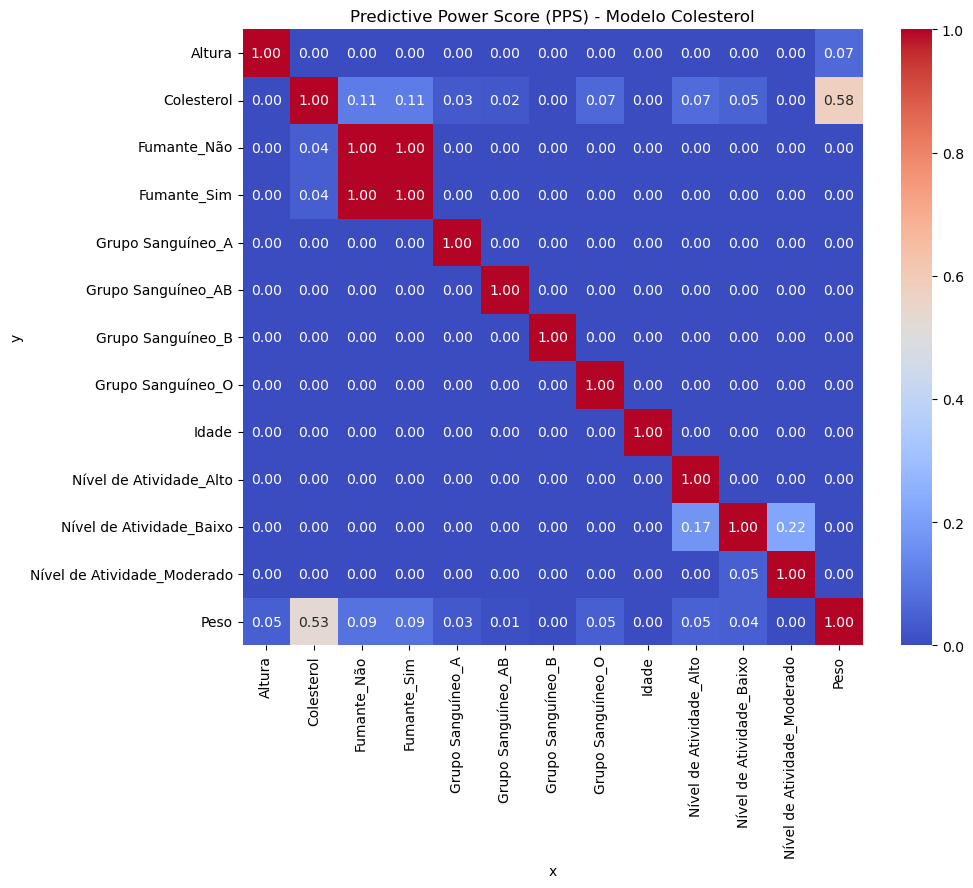

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS) - Modelo Colesterol')
plt.show()
